In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ссылка на датасет: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [19]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_acoustic
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,False
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,True
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,False
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,True
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,False


In [4]:
df[["popularity", "duration_ms", "danceability",
   "energy", "loudness", "acousticness",
   "liveness", "valence", "tempo"]].describe()

,popularity,duration_ms,danceability,energy,loudness,acousticness,liveness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.314910,0.213553,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.332523,0.190378,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.016900,0.098000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.169000,0.132000,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.598000,0.273000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.996000,1.000000,0.995000,243.372000


### Это наши основные числовые данные

Числовые признаки были выброшены:
- Unnamed: 0 (просто id)
- key (тональность)
- mode (мажор // минор)
- speechiness (наличие разговорной речи, способ отличить музыку от подкастов)
- instrumentalness (содержание вокальных партий)
- time_signature (размер такта)

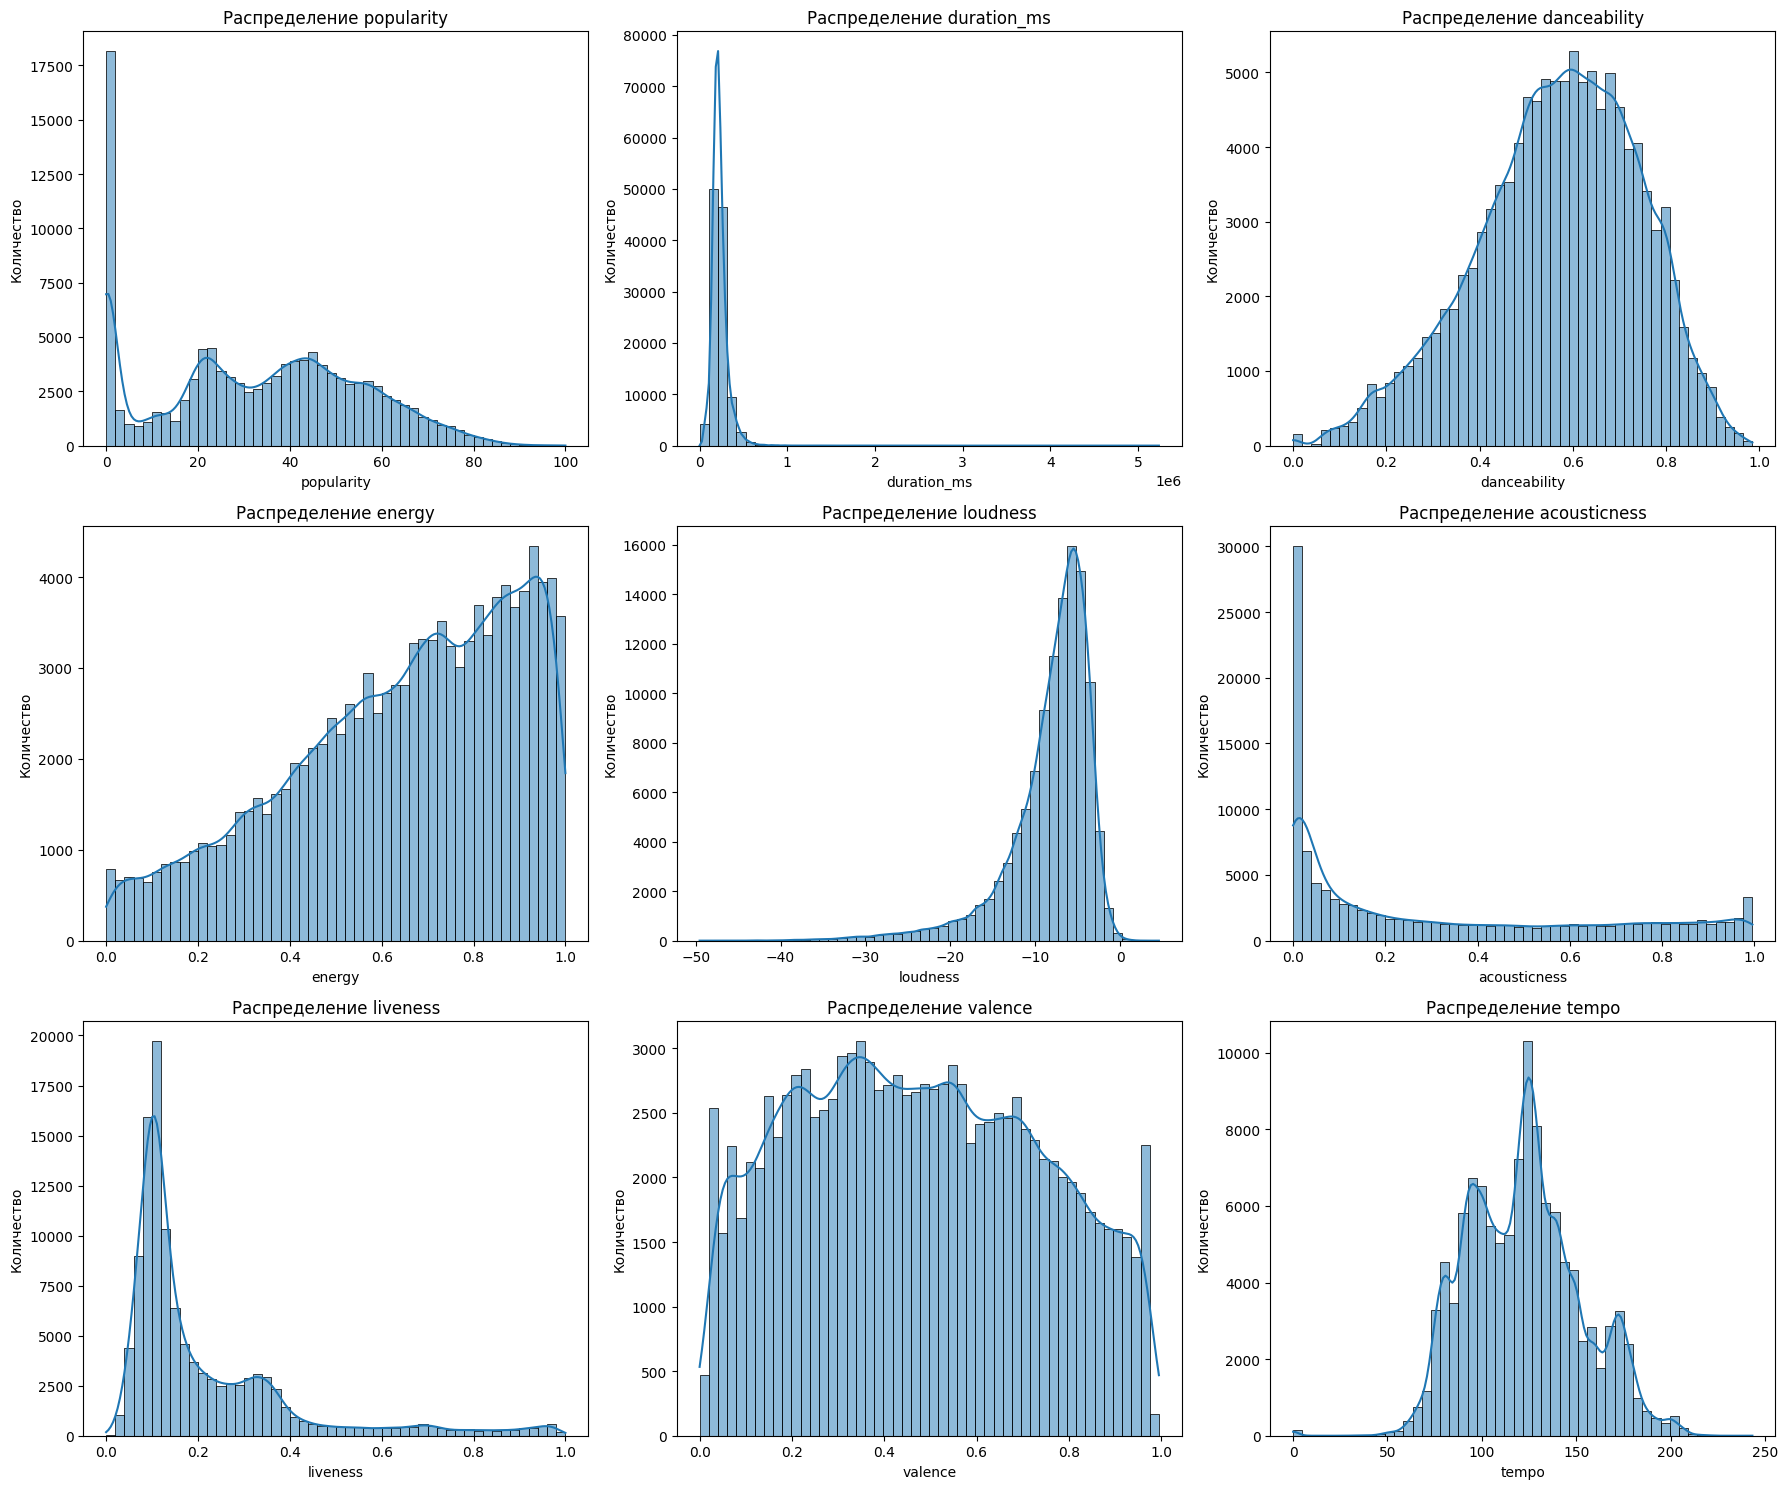

In [5]:
key_numerical_values = [
    "popularity", "duration_ms", "danceability",
   "energy", "loudness", "acousticness",
   "liveness", "valence", "tempo",
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, parameter in enumerate(key_numerical_values):
    sns.histplot(df[parameter], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Распределение {parameter}')
    axes[i].set_xlabel(parameter)
    axes[i].set_ylabel('Количество')

plt.tight_layout()
plt.savefig("im1.png")
plt.show()

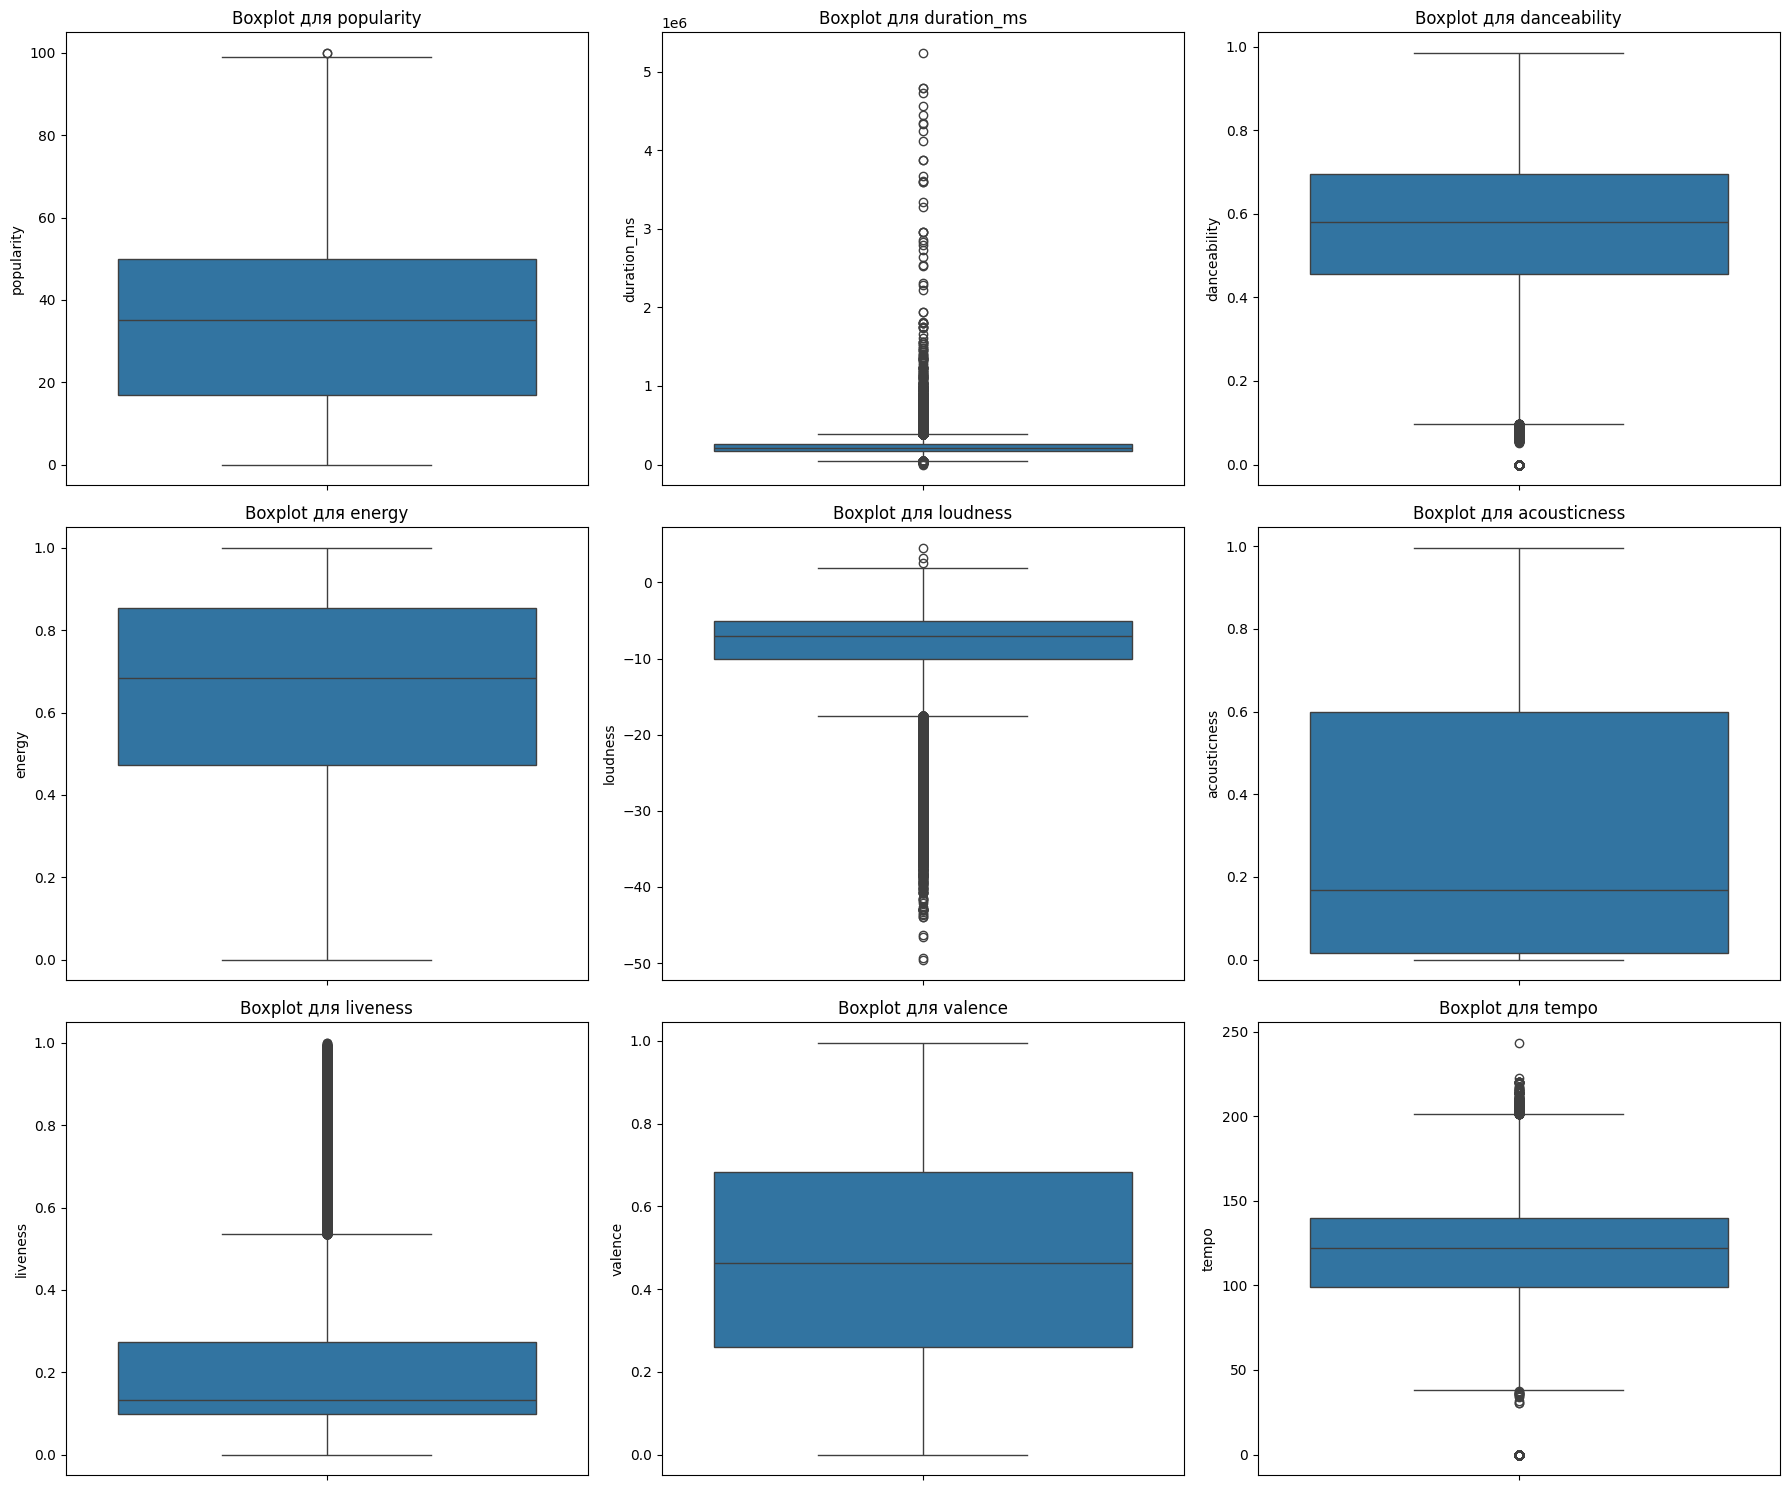

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, parameter in enumerate(key_numerical_values):
    sns.boxplot(y=df[parameter], ax=axes[i])
    axes[i].set_title(f'Boxplot для {parameter}')
    axes[i].set_ylabel(parameter)

plt.tight_layout()
plt.savefig("im2.png")
plt.show()

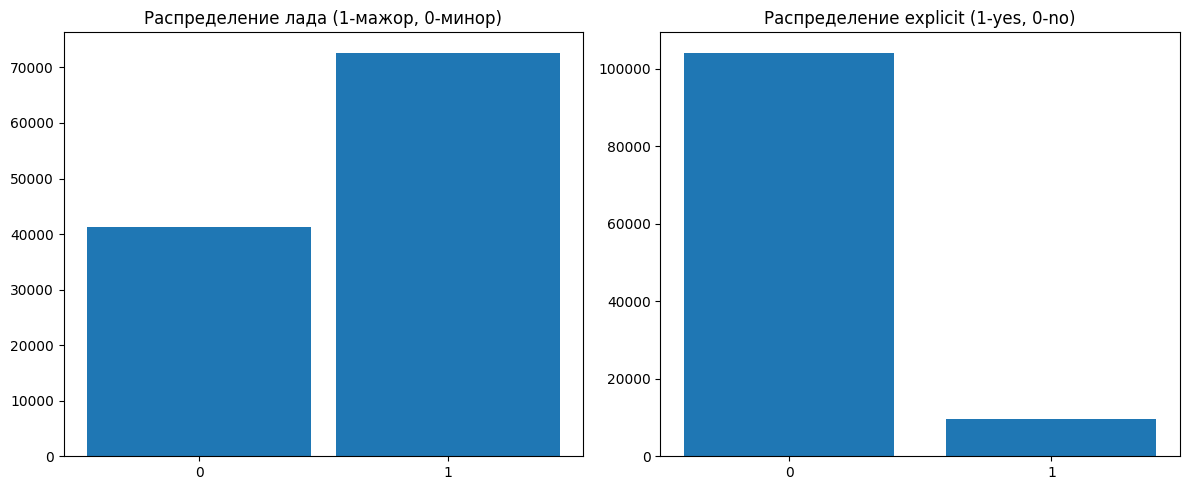

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(df["mode"].value_counts().index, df["mode"].value_counts().values, width=0.9)
axes[0].set_xticks([0, 1])
axes[0].set_title("Распределение лада (1-мажор, 0-минор)")

axes[1].bar(df["explicit"].value_counts().index, df["explicit"].value_counts().values)
axes[1].set_xticks([0, 1])
axes[1].set_title("Распределение explicit (1-yes, 0-no)")

plt.tight_layout()
plt.savefig("im3.png")
plt.show()

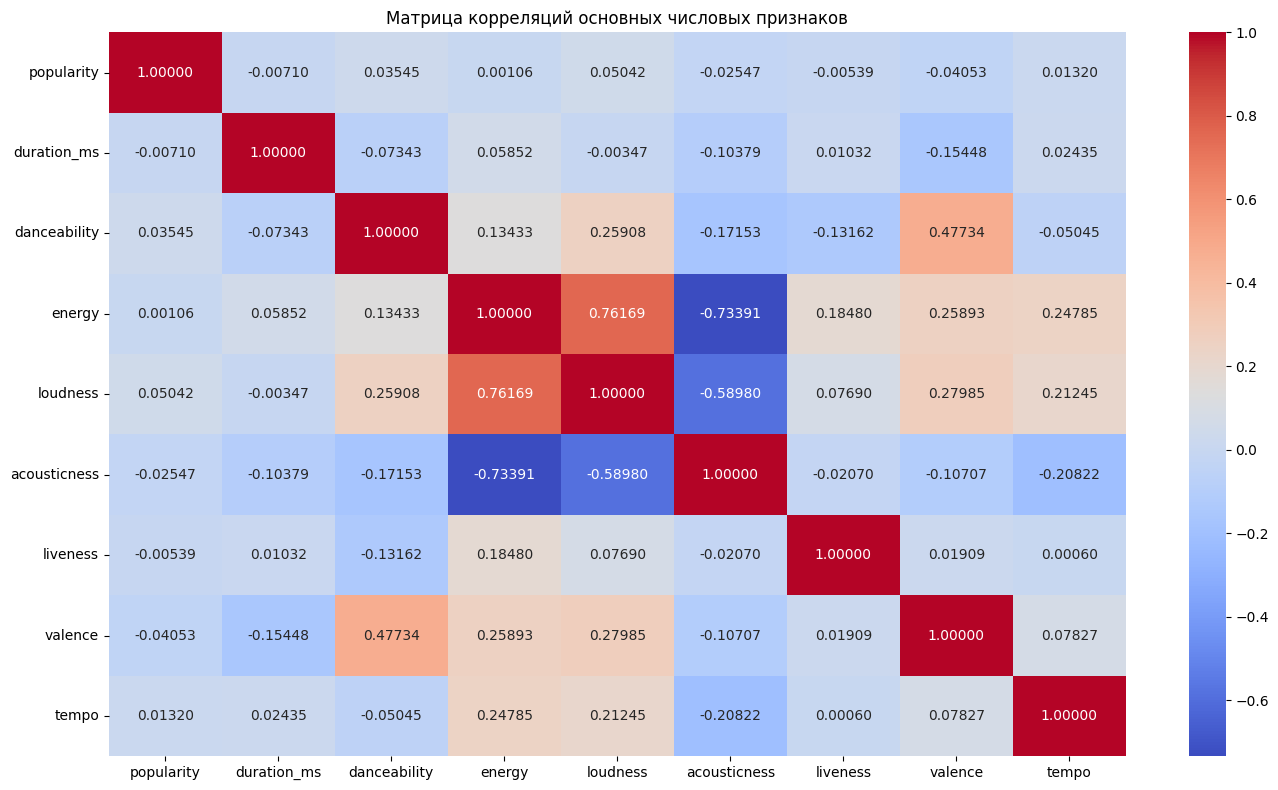

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[key_numerical_values].corr(), annot=True, fmt=".5f", cmap="coolwarm")
plt.title("Матрица корреляций основных числовых признаков")
plt.tight_layout()
plt.savefig("im4.png")
plt.show()

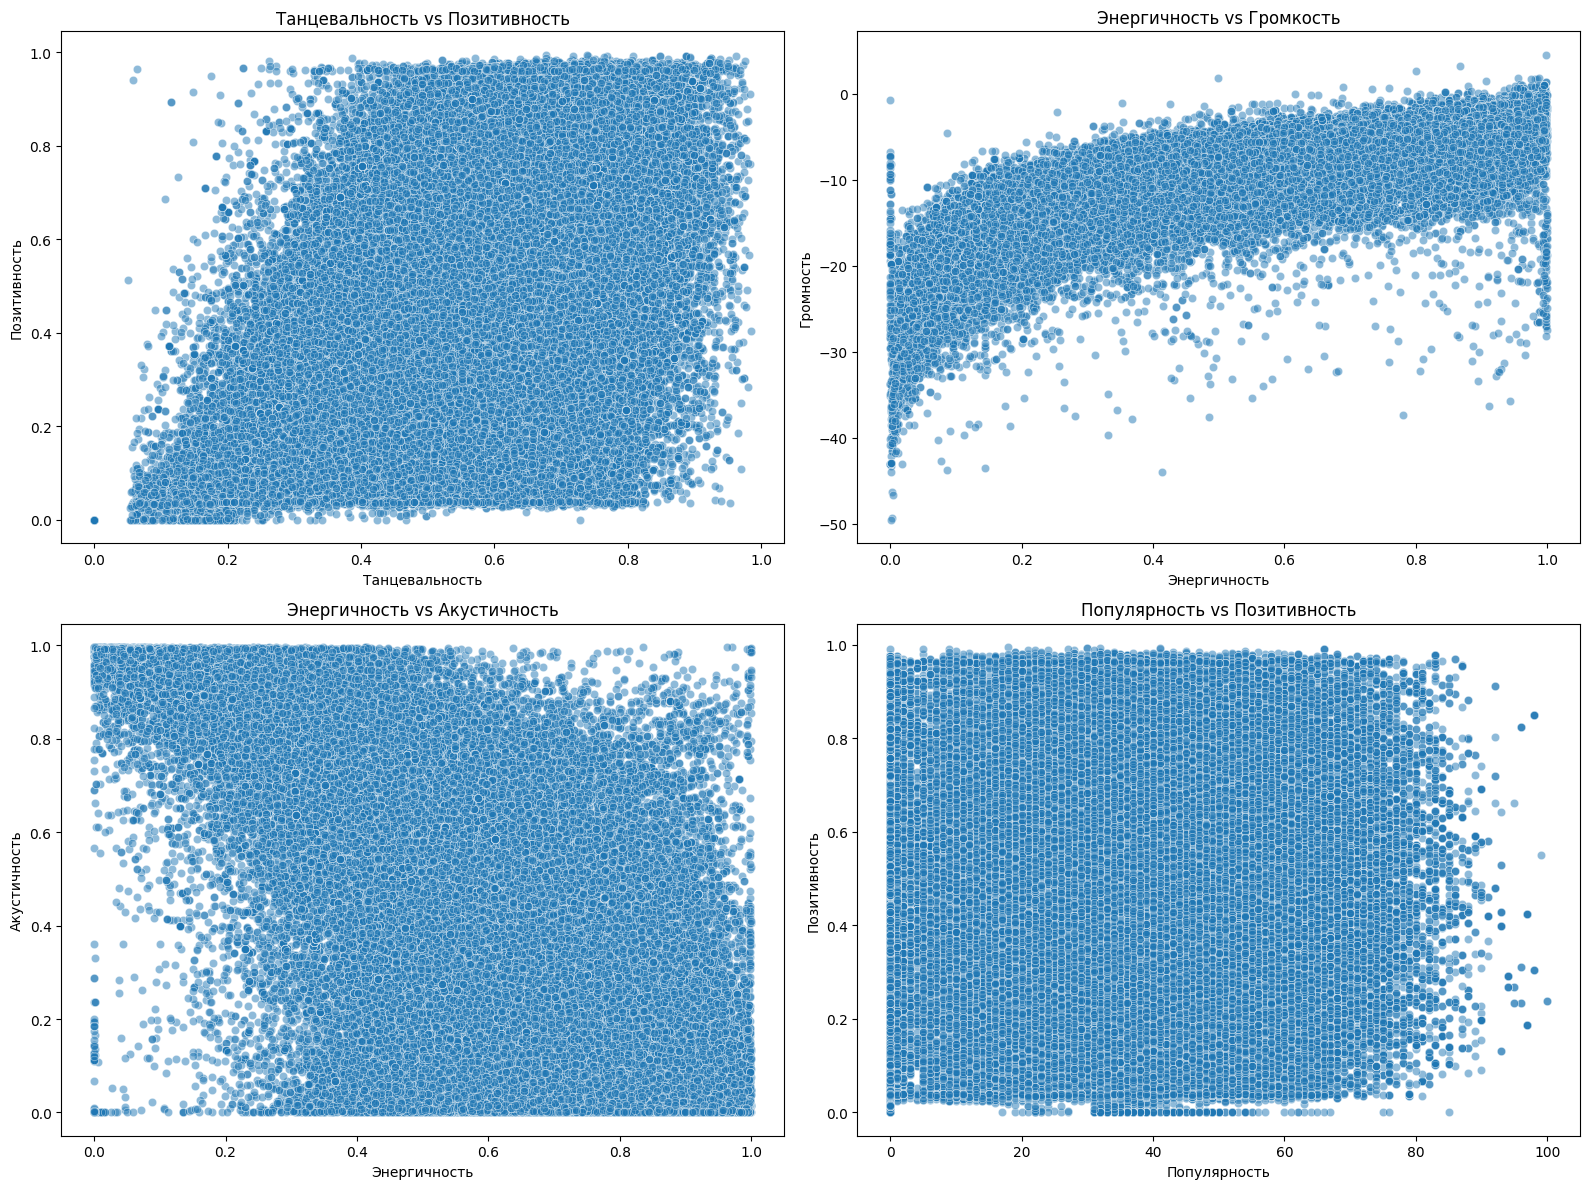

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df, x="danceability", y="valence", ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title("Танцевальность vs Позитивность")
axes[0, 0].set_xlabel("Танцевальность")
axes[0, 0].set_ylabel("Позитивность")

sns.scatterplot(data=df, x="energy", y="loudness", ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title("Энергичность vs Громкость")
axes[0, 1].set_xlabel("Энергичность")
axes[0, 1].set_ylabel("Громность")

sns.scatterplot(data=df, x="energy", y="acousticness", ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title("Энергичность vs Акустичность")
axes[1, 0].set_xlabel("Энергичность")
axes[1, 0].set_ylabel("Акустичность")

sns.scatterplot(data=df, x="popularity", y="valence", ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title("Популярность vs Позитивность")
axes[1, 1].set_xlabel("Популярность")
axes[1, 1].set_ylabel("Позитивность")

plt.tight_layout()
plt.savefig("im5.png")
plt.show()

## Гипотеза 1. Влияние эксплицитности контента на популярность
$H_0$: Средняя популярность эксплицитного контента не отличается от неэксплицитного.  
$H_1$: Средняя популярность эксплицитного контента отличается от эксплицитного.

In [10]:
explicit_tracks = df[df["explicit"] == True]["popularity"]
non_explicit_tracks = df[df["explicit"] == False]["popularity"]

print(f"Количество эксплицитных треков: {len(explicit_tracks)}")
print(f"Средняя популярность эксплицитных треков: {explicit_tracks.mean():.3f}")

print(f"Количество неэксплицитных треков: {len(non_explicit_tracks)}")
print(f"Средняя популярность неэксплицитных треков: {non_explicit_tracks.mean():.3f}")

Количество эксплицитных треков: 9747
Средняя популярность эксплицитных треков: 36.454
Количество неэксплицитных треков: 104253
Средняя популярность неэксплицитных треков: 32.938


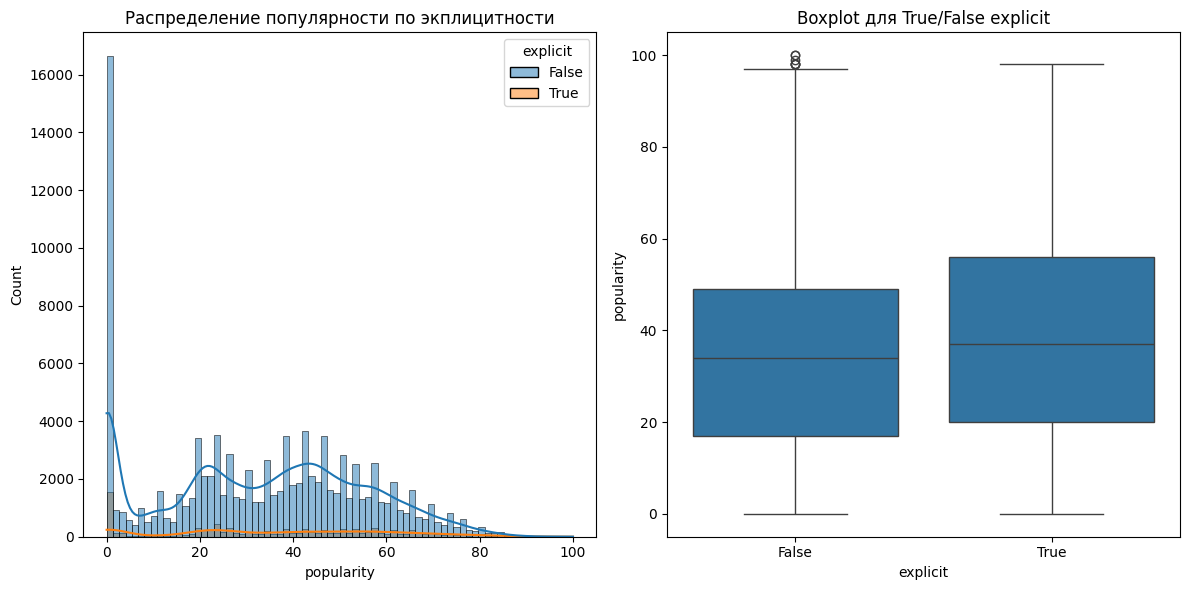

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="popularity", hue="explicit", kde=True, alpha=0.5)
plt.title("Распределение популярности по экплицитности")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="explicit", y="popularity")
plt.title("Boxplot для True/False explicit")

plt.tight_layout()
plt.savefig("im6.png")
plt.show()

In [12]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

sample_size = 3000

explicit_sample = explicit_tracks.sample(sample_size, random_state=83)
non_explicit_sample = non_explicit_tracks.sample(sample_size, random_state=83)

stat_explicit, p_explicit = shapiro(explicit_sample)
stat_non_explicit, p_non_explicit = shapiro(non_explicit_sample)

print("Тест нормальности Шапиро-Уилка:")
print(f"Эксплицитные треки: p-value = {p_explicit:.10f}")
print(f"Неэксплицитные треки: p-value = {p_non_explicit:.10f}")

stat_levene, p_levene = levene(explicit_sample, non_explicit_sample)
print(f"\nТест Левена на равенство дисперсий: p-value = {p_levene:.10f}")

if p_explicit < 0.05 or p_non_explicit < 0.05:
    stat, p_value = mannwhitneyu(explicit_sample, non_explicit_sample, alternative="two-sided")
    test_name = "U-тест Манна-Уитни"
else:
    if p_levene < 0.05:
        stat, p_value = ttest_ind(explicit_sample, non_explicit_sample, equal_var=False)
    else:
        stat, p_value = ttest_ind(explicit_sample, non_explicit_sample, equal_var=True)
    test_name = "t-тест Стьюдента"

print(f"\nСтатистический критерий: {test_name}")
print(f"Статистика = {stat}, p-value = {p_value:.10f}\n")

alpha = 0.05
if p_value < alpha:
    print("ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ")
    print("Существует статистическая значимость эксплицитности в популярности треков.")
    if explicit_tracks.mean() > non_explicit_tracks.mean():
        print("Популярность эксплицитных треков статистически выше")
    else:
        print("Популярность неэксплицитных треков статистически выше")
else:
    print("ПРИНИМАЕМ НУЛЕВУЮ ГИПОТЕЗУ")
    print("Нет статистически значимой разницы в популярность эксплицитных и неэксплицитных треков.")

Тест нормальности Шапиро-Уилка:
Эксплицитные треки: p-value = 0.0000000000
Неэксплицитные треки: p-value = 0.0000000000

Тест Левена на равенство дисперсий: p-value = 0.0000000275

Статистический критерий: U-тест Манна-Уитни
Статистика = 4784218.5, p-value = 0.0000221046

ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ
Существует статистическая значимость эксплицитности в популярности треков.
Популярность эксплицитных треков статистически выше


## Гипотеза 2
$H_0$: Корреляция между танцевальностью и позитивностью треков равна нулю.  
$H_1$: Существует положительная корреляция между танцевальностью и позитивностью.

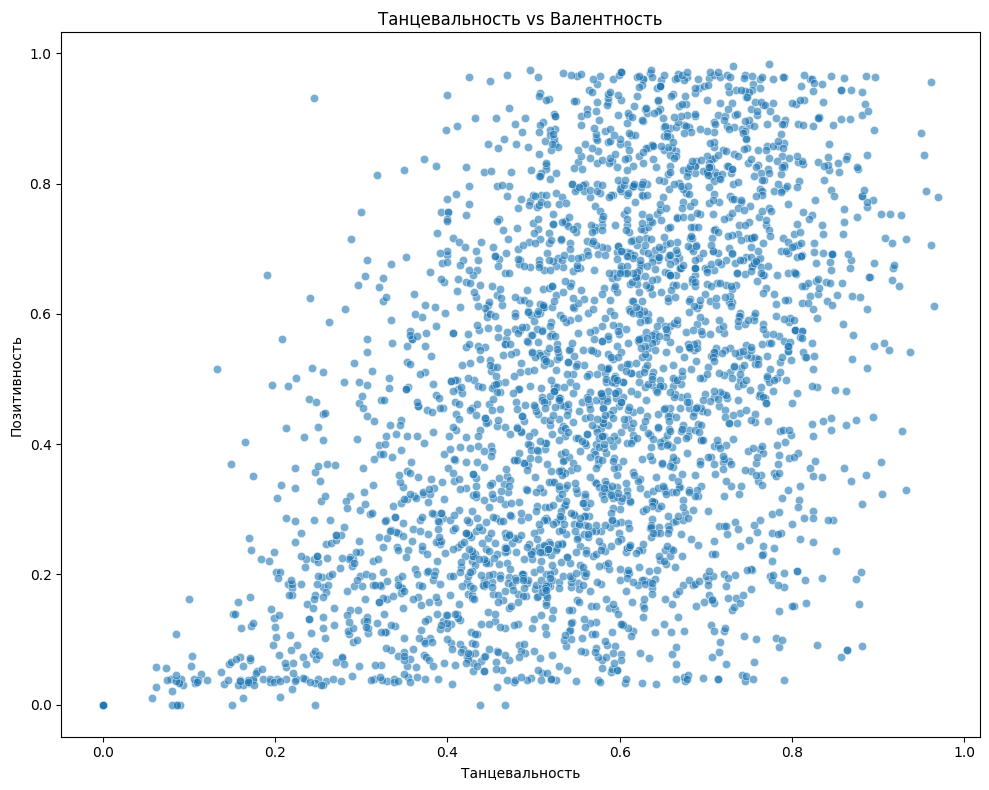

In [13]:

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df.sample(sample_size, random_state=83), x="danceability", y="valence", alpha=0.6)
plt.title("Танцевальность vs Валентность")
plt.xlabel("Танцевальность")
plt.ylabel("Позитивность")

plt.tight_layout()
plt.savefig("im7.png")
plt.show()

In [14]:
from  scipy.stats import spearmanr
from scipy.stats import pearsonr

dance_sample = df["danceability"].sample(sample_size, random_state=83)
valence_sample = df["valence"].sample(sample_size, random_state=83)

stat_dance, p_dance = shapiro(dance_sample)
stat_valence, p_valence = shapiro(valence_sample)

print(f"Тест нормальности для танцевальности: p_value = {p_dance:.10f}")
print(f"Тест нормальности для позитивности: p_value = {p_valence:.10f}")

if p_dance < 0.05 or p_valence < 0.05:
    corr, p_value = spearmanr(dance_sample, valence_sample)
    test_name = "Корреляция Спирмена"
else:
    corr, p_value = pearsonr(dance_sample, valence_sample)
    test_name = "Корреляция Пирсона"

print(f"Статистический критерий: {test_name}")
print(f"Коэффициент корреляции = {corr:.10f}, p_value = {p_value:.10f}\n")

direction = "положительная" if corr > 0 else "отрицательная"

alpha = 0.05
if p_value < alpha:
    print(f"ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ")
    print(f"Обнаружена статистически значимая {direction} корреляция между танцевальностью и валентностью")
    print(f"Коэффициент корреляции: {corr:.10f}")
else:
    print("НЕ ОТВЕРГАМ НУЛЕВУЮ ГИПОТЕЗУ")
    print("Нет статистически значимой корреляции между танцевальностью и валентностью")

Тест нормальности для танцевальности: p_value = 0.0000000000
Тест нормальности для позитивности: p_value = 0.0000000000
Статистический критерий: Корреляция Спирмена
Коэффициент корреляции = 0.4583813483, p_value = 0.0000000000

ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ
Обнаружена статистически значимая положительная корреляция между танцевальностью и валентностью
Коэффициент корреляции: 0.4583813483


## Гипотеза 3
$H_0$: Средняя позитивность (валентность) акустических треков неотличается от неакустических.  
$H_1$: Акустические треки имеют более высокую валентность.

In [15]:
df["is_acoustic"] = df["acousticness"] > 0.5

acoustic_valence = df[df["is_acoustic"] == True]["valence"]
non_acoustic_valence = df[df["is_acoustic"] == False]["valence"]

print(f"Акустических треков: {df["is_acoustic"].value_counts().values[1]}")
print(f"Средняя позитивность акустических треков: {acoustic_valence.mean()}")

print(f"\nНеакустических треков: {df["is_acoustic"].value_counts().values[0]}")
print(f"Средняя позитивность неакустических треков: {non_acoustic_valence.mean()}")

Акустических треков: 33817
Средняя позитивность акустических треков: 0.4272356454150279

Неакустических треков: 80183
Средняя позитивность неакустических треков: 0.49381976865420346


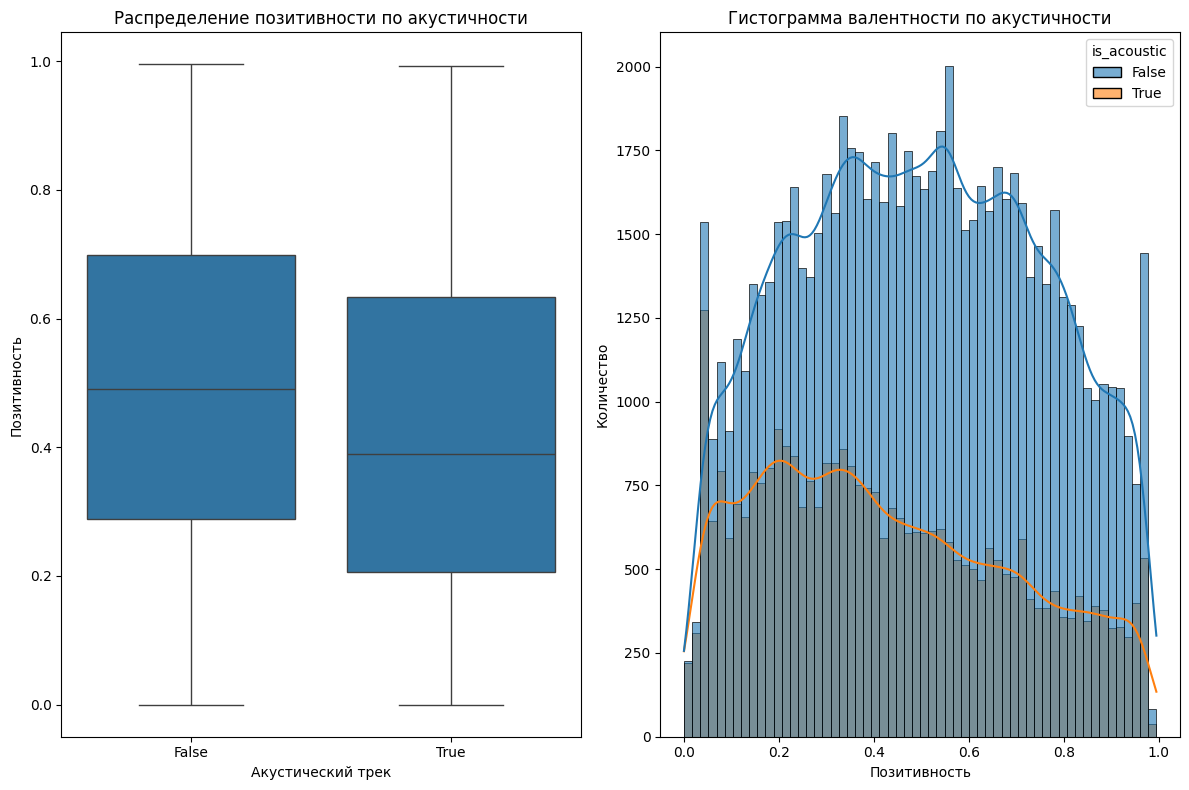

In [16]:

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["is_acoustic"], y=df["valence"])
plt.title("Распределение позитивности по акустичности")
plt.xlabel("Акустический трек")
plt.ylabel("Позитивность")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="valence", hue="is_acoustic", kde=True, alpha=0.6)
plt.title("Гистограмма валентности по акустичности")
plt.xlabel("Позитивность")
plt.ylabel("Количество")

plt.tight_layout()
plt.savefig("im8.png")
plt.show()

In [17]:
acoustic_sample = acoustic_valence.sample(sample_size, random_state=83)
non_acoustic_sample = non_acoustic_valence.sample(sample_size, random_state=83)

stat_acoustic, p_acoustic = shapiro(acoustic_sample)
stat_non_acoustic, p_non_acoustic = shapiro(non_acoustic_sample)

print("Тест на нормальность Шапиро-Уилка")
print(f"Акустические треки: p-value = {p_acoustic:.10f}")
print(f"Неакустические треки: p-value = {p_non_acoustic:.10f}")

stat_levene_val, p_levene_val = levene(acoustic_sample, non_acoustic_sample)
print(f"\nТест Левена на равенство дисперсий: p-value = {p_levene_val:.10f}")

if p_acoustic < 0.05 or p_non_acoustic < 0.05:
    stat, p_value = mannwhitneyu(acoustic_sample, non_acoustic_sample, alternative="two-sided")
    test_name = "U-тест Манна-Уитни"
else:
    if p_levene_val < 0.05:
        stat, p_value = ttest_ind(acoustic_sample, non_acoustic_sample, equal_var=False)
    else:
        stat, p_value = ttest_ind(acoustic_sample, non_acoustic_sample, equal_var=True)
    test_name = "t-тест Стьюдента"

print(f"\nСтатистический критерий: {test_name}")
print(f"Статистика = {stat}, p-value = {p_value:.10f}\n")

alpha = 0.05
if p_value < alpha:
    print("ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ")
    print("Существует статистически значимая разница в валентности между акустическими и неакустическими треками")
    if acoustic_valence.mean() > non_acoustic_valence.mean():
        print("Позитивносьь акустических треков выше")
    else:
        print("Позитивность неакустических треков выше")
else:
    print("ПРИНИМАЕМ НУЛЕВУЮ ГИПОТЕЗУ")
    print("Не существует статистически значимой разницы в позитивности между акустическими и неакустическими треками.")

Тест на нормальность Шапиро-Уилка
Акустические треки: p-value = 0.0000000000
Неакустические треки: p-value = 0.0000000000

Тест Левена на равенство дисперсий: p-value = 0.0441670105

Статистический критерий: U-тест Манна-Уитни
Статистика = 3920464.5, p-value = 0.0000000000

ОТВЕРГАЕМ НУЛЕВУЮ ГИПОТЕЗУ
Существует статистически значимая разница в валентности между акустическими и неакустическими треками
Позитивность неакустических треков выше
